In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("advertising.csv")

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Data Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

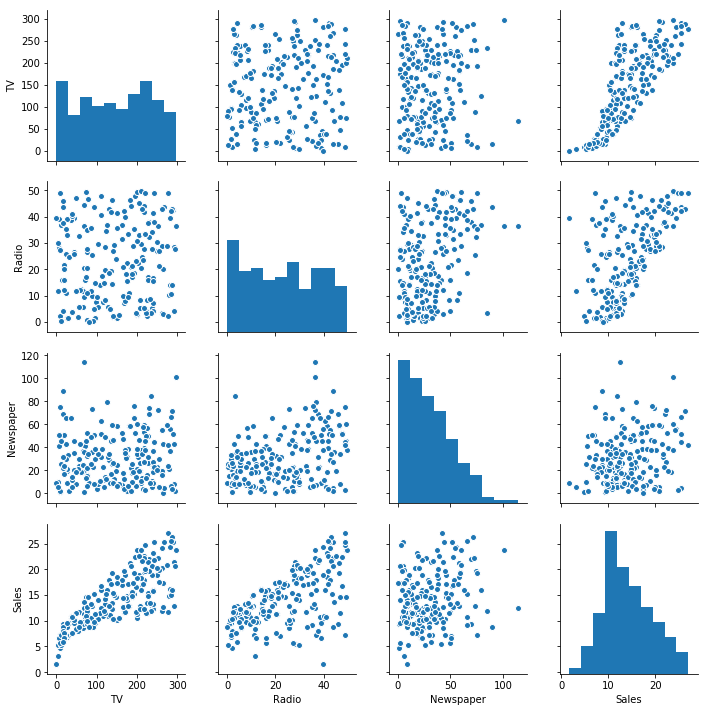

In [9]:
sns.pairplot(df)

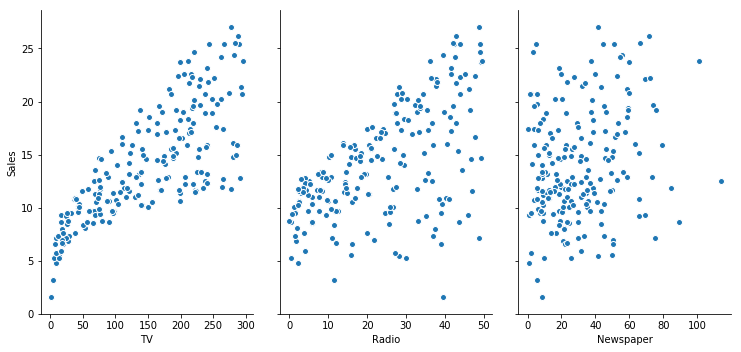

In [13]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales',size=5, aspect=0.7, kind='scatter')

Looking at the graph above, we can observe that Sales has some relationship with the TV as well as Radio but not so closely related to Newspaper

### Splitting the Data into Train and Test set

In [14]:
from sklearn.cross_validation import train_test_split

In [16]:
X=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [17]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [18]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7, random_state=100)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140,)
(60,)


### Implementing the Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [22]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model Evaluation

In [23]:
print(lr.intercept_)

2.652789668879496


In [24]:
print(lr.coef_)

[0.0454256  0.18975773 0.00460308]


In [26]:
#for better representation of the coefficients, we try to put a new dataframe with the corresponding values
coeff = pd.DataFrame(lr.coef_, X_test.columns, columns=['Coefficient'])
coeff

,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


From this we can say that if TV price increases by 1 unit then it will affect the sales by 0.0454 units. Here the Radio is strongly affecting the sales compared to any other source. Incase the values are negative then it has a negative impact on the sales as well and we may consider shutting down that source

### Predictions

In [27]:
y_pred = lr.predict(X_test)

### Calculating the Error terms

In [29]:
from sklearn.metrics import mean_squared_error,r2_score

m = mean_squared_error(y_test,y_pred)
r = r2_score(y_test,y_pred)

In [30]:
print("Mean Squared Error is: ", m )
print("r_square_value is: ", r)

Mean Squared Error is:  1.8506819941636945
r_square_value is:  0.9058622107532246


### OPTIONAL : P-Value using STATSMODEL

In [33]:
import statsmodels.api as sm

X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, (y=Bo+B1*X1+...)
#so you need to use the method sm.add_constant(X) in order to add a constant. (y=Bo*Xo+B1*X1+...) where Xo is 1
X_train_sm = sm.add_constant(X_train_sm)

#fit OLS model
lp = sm.OLS(y_train, X_train_sm).fit()

In [35]:
lp.params

const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [36]:
print(lp.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Thu, 03 Jan 2019   Prob (F-statistic):           9.97e-66
Time:                        18:27:48   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

std err -> gives the standard deviation in which the lesser the value the better
t -> coeff divided by std err
P>|t| -> gives the hypothesis so if the value is greater than 0.5 then that field is insignificant for prediction

In this case, newspaper is insignificant

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

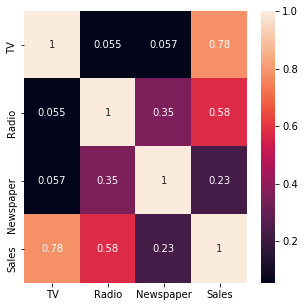

In [39]:
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(),annot = True)

### Implementing the results and running the model again

In [41]:
X_train_new = X_train[['TV','Radio']]
X_test_new = X_test[['TV','Radio']]

In [42]:
lr.fit(X_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
y_pred_new = lr.predict(X_test_new)

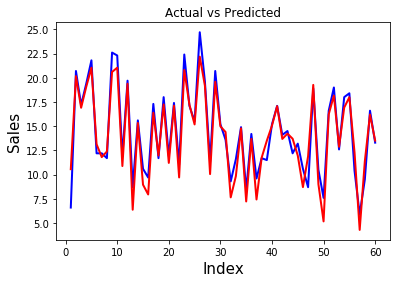

In [45]:
#Actual vs Predicted

c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test, color='blue', linewidth = 2,linestyle='-')
plt.plot(c, y_pred_new, color = 'red', linewidth = 2, linestyle='-')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.title('Actual vs Predicted')
plt.show()


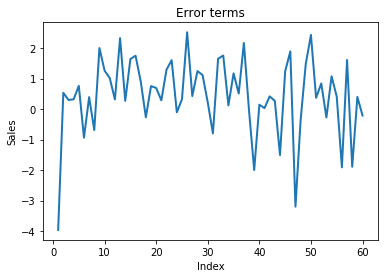

In [46]:
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c, y_test - y_pred_new, linewidth = 2,linestyle='-' )
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Error terms')
plt.show()

In [47]:
#checking with the mean_squared_error and r square

from sklearn.metrics import mean_squared_error, r2_score

m2 = mean_squared_error(y_test, y_pred_new)
r2 = r2_score(y_test,y_pred_new)

print("Mean squared error is: " , m2)
print("R square value is: ", r2)

Mean squared error is:  1.784740052090281
R square value is:  0.909216449171822


In [48]:
#using the statsmodel for checking the summary report

import statsmodels.api as sm

X_train_final = X_train_new

X_train_final = sm.add_constant(X_train_final)

lr_final = sm.OLS(y_train,X_train_final).fit()

print(lr_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Thu, 03 Jan 2019   Prob (F-statistic):           4.46e-67
Time:                        18:57:21   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0